In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.ndimage import uniform_filter1d
import os 

def correct_channel(input, channel_map_location):
    map_location = channel_map_location
    channel_map = loadmat(map_location)
    all_channel = [ch[0] for ch in channel_map['Channel'][0][0][0][0]] # ['C29', 'C39', 'C18', 'C28', 'C30', 'C31', 'C41', 'C20', 'C43', 'C32', 'C44', 'C45', 'C34', 'C46', 'C47', 'C36', 'C48', 'C49', 'C38', 'C40', 'C50', 'C51', 'C42', 'C52', 'C1', 'C11', 'C2', 'C3', 'C13', 'C4', 'C5', 'C15', 'C6', 'C7', 'C17', 'C19', 'C8', 'C9', 'C21', 'C10', 'C12', 'C33', 'C22', 'C23', 'C35', 'C14', 'C24', 'C25', 'C37', 'C16', 'C26', 'C27']
    correct_location = [all_channel.index('C'+str(i)) for i in range(1, 53)] # [index_of_'C1', index_of_'C2', index_of_'C3', ...]
    assert input.shape[1] == 52
    res = input[:, correct_location,...]
    return res 

def read_mat_file(path, avg=10):
    # load data 
    data = loadmat(path)

    # load hb 
    hb = data['data_hb']

    # load label 
    label = data['label'][:,0]

    print([i for i in data])

    print(f"data shape: {hb.shape}")
    print(f"label shape: {label.shape}")

    # get the average of every 10 datapoint  
    hb = hb[..., :1250]
    print(f" Cut the shape of hb into -> {hb.shape}")

    hb = uniform_filter1d(hb, size=avg, axis=-1, mode='nearest')
    print(f" Smoothing the shape of hb -> {hb.shape}")

    hb = hb.reshape(hb.shape[0], hb.shape[1], -1, 10)
    print(f" Reshaping the shape of hb -> {hb.shape}")

    hb = hb.mean(axis=-1)
    print(f" Averaging the shape of hb -> {hb.shape}")
    
    plt.figure()
    plt.plot(np.mean(hb, axis=(0,1)))
    plt.title(f"Show the time series of the average of all channels and all subjects")

    return hb, label

['__header__', '__version__', '__globals__', 'data_hb', 'label', 'subject_name', 'channel_flag']
data shape: (141, 52, 1251)
label shape: (141,)
 Cut the shape of hb into -> (141, 52, 1250)
 Smoothing the shape of hb -> (141, 52, 1250)
 Reshaping the shape of hb -> (141, 52, 125, 10)
 Averaging the shape of hb -> (141, 52, 125)
['__header__', '__version__', '__globals__', 'data_hb', 'label', 'subject_name', 'channel_flag']
data shape: (141, 52, 1251)
label shape: (141,)
 Cut the shape of hb into -> (141, 52, 1250)
 Smoothing the shape of hb -> (141, 52, 1250)
 Reshaping the shape of hb -> (141, 52, 125, 10)
 Averaging the shape of hb -> (141, 52, 125)
['__header__', '__version__', '__globals__', 'data_hb', 'label', 'subject_name', 'channel_flag']
data shape: (141, 52, 1251)
label shape: (141,)
 Cut the shape of hb into -> (141, 52, 1250)
 Smoothing the shape of hb -> (141, 52, 1250)
 Reshaping the shape of hb -> (141, 52, 125, 10)
 Averaging the shape of hb -> (141, 52, 125)
(141, 52, 

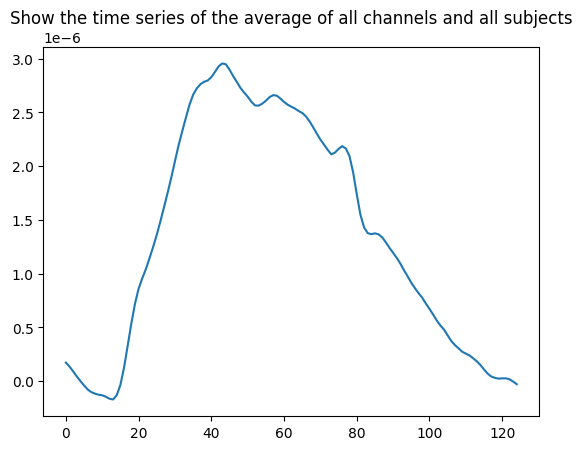

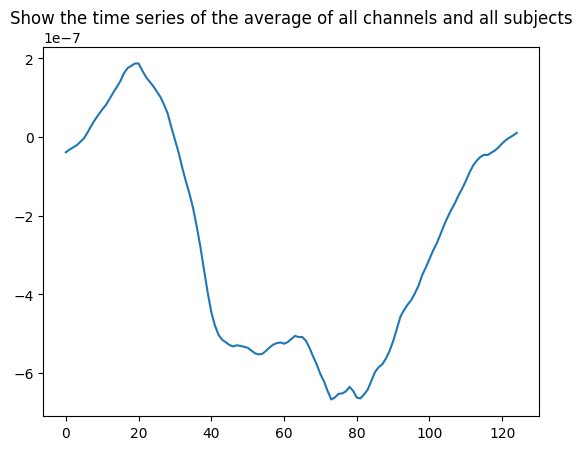

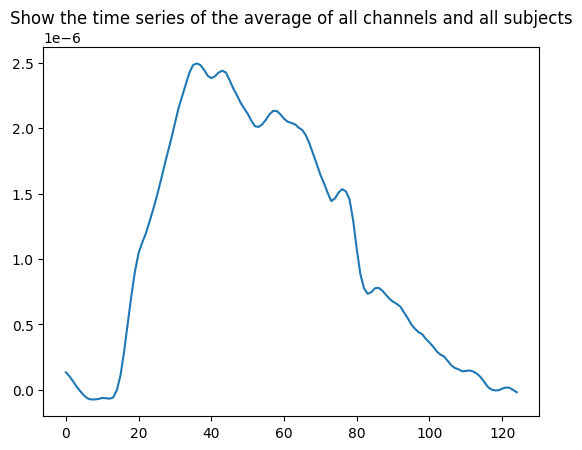

In [3]:

avg = 1

path_hbo = '/Users/shanxiafeng/Documents/Code/python/fnirs_DL/JinyuanWang_pythonCode/Prerequisite/data_all_original/Gabrielle_s Data/All 52-channel/all52CH_prep_HbO.mat'
path_hbr = '/Users/shanxiafeng/Documents/Code/python/fnirs_DL/JinyuanWang_pythonCode/Prerequisite/data_all_original/Gabrielle_s Data/All 52-channel/all52CH_prep_HbR.mat'
path_hbt = '/Users/shanxiafeng/Documents/Code/python/fnirs_DL/JinyuanWang_pythonCode/Prerequisite/data_all_original/Gabrielle_s Data/All 52-channel/all52CH_prep_HbT.mat'

correct_channel_path = '/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction/allData/zf_prognosis/Channel_Configuration.mat'

hbo, label = read_mat_file(path_hbo, avg)
hbr, label = read_mat_file(path_hbr, avg)
hbt, label = read_mat_file(path_hbt, avg)

hb = np.concatenate([hbo[..., np.newaxis], hbr[..., np.newaxis], hbt[..., np.newaxis]], axis=-1)

hb = correct_channel(hb, correct_channel_path)

print(hb.shape)

output_fold = f'/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction/allData/dataset_514/gabrielle_num_of_sub_141'
if not os.path.exists(output_fold):
    os.makedirs(output_fold)
    
np.save(os.path.join(output_fold, 'hb_data.npy'), hb)
np.save(os.path.join(output_fold, 'label.npy'), label)

['__header__', '__version__', '__globals__', 'data_hb', 'label', 'subject_name', 'channel_flag']
data shape: (374, 52, 1251)
label shape: (374,)
 Cut the shape of hb into -> (374, 52, 1250)
 Reshaping the shape of hb -> (374, 52, 125, 10)
 Averaging the shape of hb -> (374, 52, 125)
['__header__', '__version__', '__globals__', 'data_hb', 'label', 'subject_name', 'channel_flag']
data shape: (374, 52, 1251)
label shape: (374,)
 Cut the shape of hb into -> (374, 52, 1250)
 Reshaping the shape of hb -> (374, 52, 125, 10)
 Averaging the shape of hb -> (374, 52, 125)
['__header__', '__version__', '__globals__', 'data_hb', 'label', 'subject_name', 'channel_flag']
data shape: (374, 52, 1251)
label shape: (374,)
 Cut the shape of hb into -> (374, 52, 1250)
 Reshaping the shape of hb -> (374, 52, 125, 10)
 Averaging the shape of hb -> (374, 52, 125)
(374, 52, 125, 3)


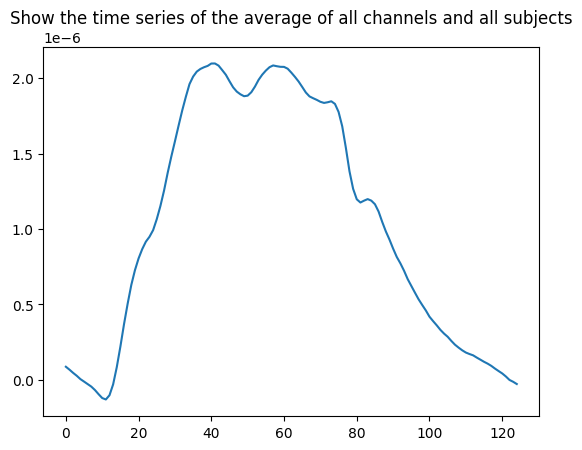

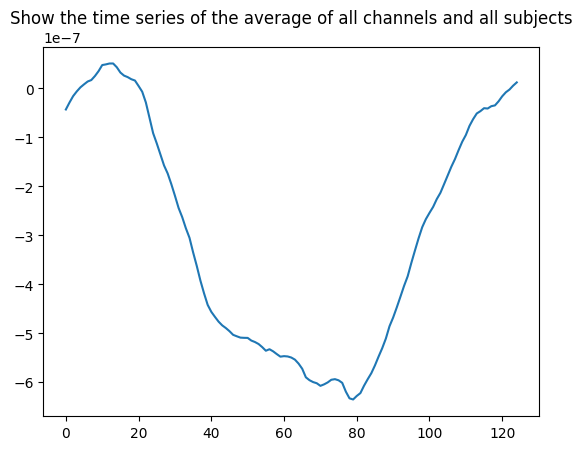

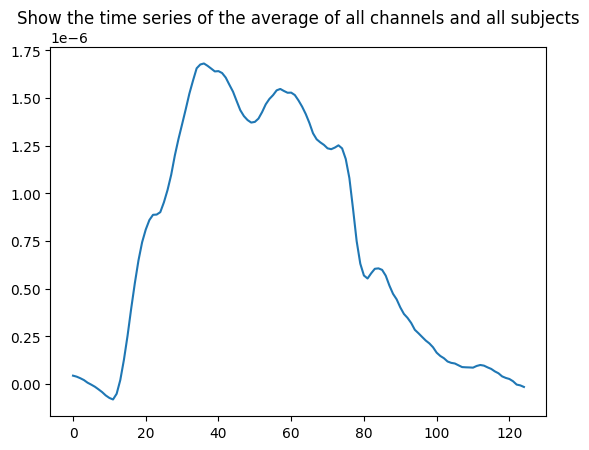

In [3]:
path_hbo = '/Users/shanxiafeng/Documents/Code/python/fnirs_DL/JinyuanWang_pythonCode/Prerequisite/data_all_original/Fabeha_s Data/All 52-channel/all52CH_prep_HbO.mat'
path_hbr = '/Users/shanxiafeng/Documents/Code/python/fnirs_DL/JinyuanWang_pythonCode/Prerequisite/data_all_original/Fabeha_s Data/All 52-channel/all52CH_prep_HbR.mat'
path_hbt = '/Users/shanxiafeng/Documents/Code/python/fnirs_DL/JinyuanWang_pythonCode/Prerequisite/data_all_original/Fabeha_s Data/All 52-channel/all52CH_prep_HbT.mat'

correct_channel_path = '/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction/allData/zf_prognosis/Channel_Configuration.mat'

hbo, label = read_mat_file(path_hbo)
hbr, label = read_mat_file(path_hbr)
hbt, label = read_mat_file(path_hbt)

hb = np.concatenate([hbo[..., np.newaxis], hbr[..., np.newaxis], hbt[..., np.newaxis]], axis=-1)

hb = correct_channel(hb, correct_channel_path)

print(hb.shape)

output_fold = f"/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction/allData/dataset_514/fabeha_num_of_sub_{hb.shape[0]}"
if not os.path.exists(output_fold):
    os.makedirs(output_fold)
    
np.save(os.path.join(output_fold, 'hb_data.npy'), hb)
np.save(os.path.join(output_fold, 'label.npy'), label)